# Trabalho Prático do Módulo 1

In [42]:
import pandas as pd
import numpy as np
import locale
from datetime import datetime
locale.setlocale(locale.LC_ALL, '')

from math import sqrt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
from matplotlib.dates import DateLocator
from matplotlib.dates import DateFormatter
from matplotlib.dates import AutoDateLocator
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

### Questão-01: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active”, apenas para a Itália (Italy), como fica o gráfico?

In [43]:
df = pd.read_csv('data/covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])

In [44]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [45]:
# Lib usada para gerar tabela no formato Markdown para acrescentar no README.MD 
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='pipe'))

|    |   SNo | ObservationDate     | Province/State   | Country/Region   | Last Update     |   Confirmed |   Deaths |   Recovered |   Active |
|---:|------:|:--------------------|:-----------------|:-----------------|:----------------|------------:|---------:|------------:|---------:|
|  0 |     1 | 2020-01-22 00:00:00 | Anhui            | Mainland China   | 1/22/2020 17:00 |           1 |        0 |           0 |        1 |
|  1 |     2 | 2020-01-22 00:00:00 | Beijing          | Mainland China   | 1/22/2020 17:00 |          14 |        0 |           0 |       14 |
|  2 |     3 | 2020-01-22 00:00:00 | Chongqing        | Mainland China   | 1/22/2020 17:00 |           6 |        0 |           0 |        6 |
|  3 |     4 | 2020-01-22 00:00:00 | Fujian           | Mainland China   | 1/22/2020 17:00 |           1 |        0 |           0 |        1 |
|  4 |     5 | 2020-01-22 00:00:00 | Gansu            | Mainland China   | 1/22/2020 17:00 |           0 |        0 |           0 |        0 |

In [46]:
# Comando utilizado para pegar data no gráfico onde os dados precisavam ser truncados
df['ObservationDate'].loc[df['Active'] == 78457] 

24208   2020-05-13
Name: ObservationDate, dtype: datetime64[ns]

Text(0.0, 1.08, 'Questão-01: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico\ncom a medida “Active”, apenas para a Itália (Italy), como fica o gráfico? ')

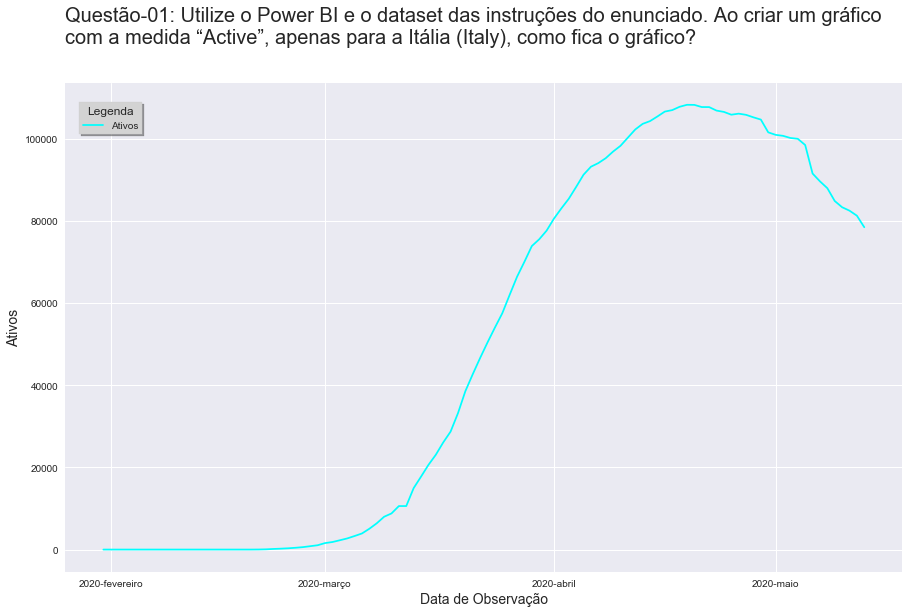

In [47]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15,9))
x = df['ObservationDate'].loc[(df['Country/Region'] == 'Italy') 
                              & (df['ObservationDate'] <= '2020-05-13')]

ax.plot(x, df['Active'].loc[(df['Country/Region'] == 'Italy') 
                              & (df['ObservationDate'] <= '2020-05-13')], color='cyan', label='Ativos')

ax.set_xlabel('Data de Observação', fontsize=14)
ax.set_ylabel('Ativos', fontsize=14)
locator = AutoDateLocator(minticks=3, maxticks=5)
date_fmt = DateFormatter('%Y-%B')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
ax.legend(loc="upper left", bbox_to_anchor=[0.01, 0.97], ncol=2, 
          shadow=True, frameon=True, title="Legenda", title_fontsize=12, 
          fancybox=False, facecolor="lightgrey")

plt.text(0.0, 1.08, 'Questão-01: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico'
                     '\ncom a medida “Active”, apenas para a Itália (Italy), como fica o gráfico? ',
         horizontalalignment='left',
         fontsize=20,
         transform = ax.transAxes)

### Questão-02: Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução? 

In [48]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
centroid_coords = kmeans.cluster_centers_

In [49]:
print(f'As coordenadas do centroid para 1 cluster é: {centroid_coords[0]}')


As coordenadas do centroid para 1 cluster é: [ 0.02618523 -1.30384304]


### Questão-03: Considere o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters? 

In [50]:
sum_of_squared_distances = []
N = 25
K = range(1,N)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

Text(0.5, 1.0, 'Método do Cotovelo')

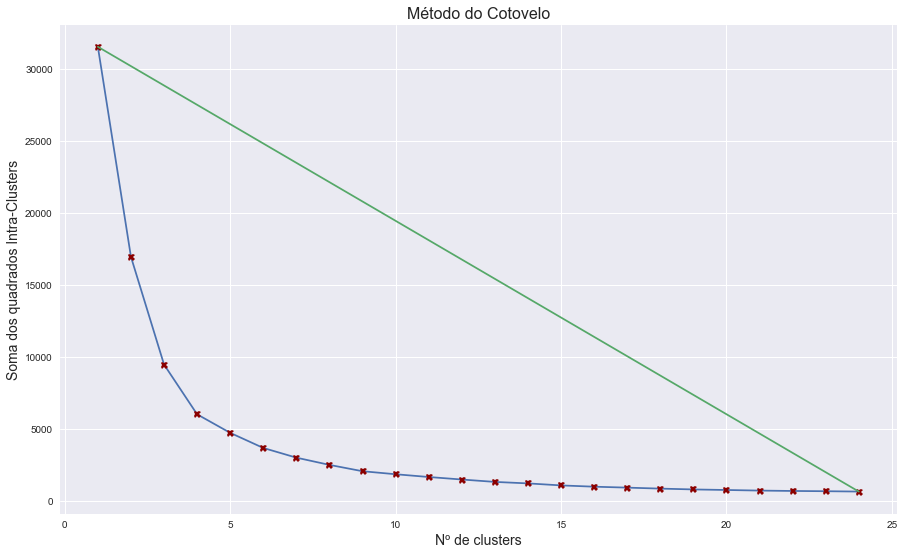

In [51]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(K, sum_of_squared_distances, '-')
ax.plot(K, sum_of_squared_distances, 'X', color='darkred')
ax.set_xlabel('Nº de clusters', fontsize=14)
ax.set_ylabel('Soma dos quadrados Intra-Clusters', fontsize=14)
ax.plot([1, N - 1],[sum_of_squared_distances[0], sum_of_squared_distances[len(sum_of_squared_distances)-1]])
plt.title('Método do Cotovelo', fontsize=16)


In [52]:
def optimal_number_of_clusters(sum_of_squared_distances):
    x1, y1 = 2, sum_of_squared_distances[0]
    x2, y2 = 20, sum_of_squared_distances[len(sum_of_squared_distances)-1]

    distances = []
    for i in range(len(sum_of_squared_distances)):
        x0 = i+2
        y0 = sum_of_squared_distances[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2


In [53]:
print(f'O número ideal de cluster obtido pelo Método do Cotovelo é: {optimal_number_of_clusters(sum_of_squared_distances)}')

O número ideal de cluster obtido pelo Método do Cotovelo é: 5


### Questão-04: Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

In [54]:
df['Months'] = [month.strftime("%B") for month in df['ObservationDate']]

In [55]:
peak = max(df['Active'].loc[df['Country/Region'] == 'South Korea'])
m_peak = df['ObservationDate'].loc[df['Active'] == peak].values
month = pd.to_datetime(str(m_peak[0])).strftime('%B')

Text(0.0, 1.08, 'O pico máximo ocorreu no mês de março.')

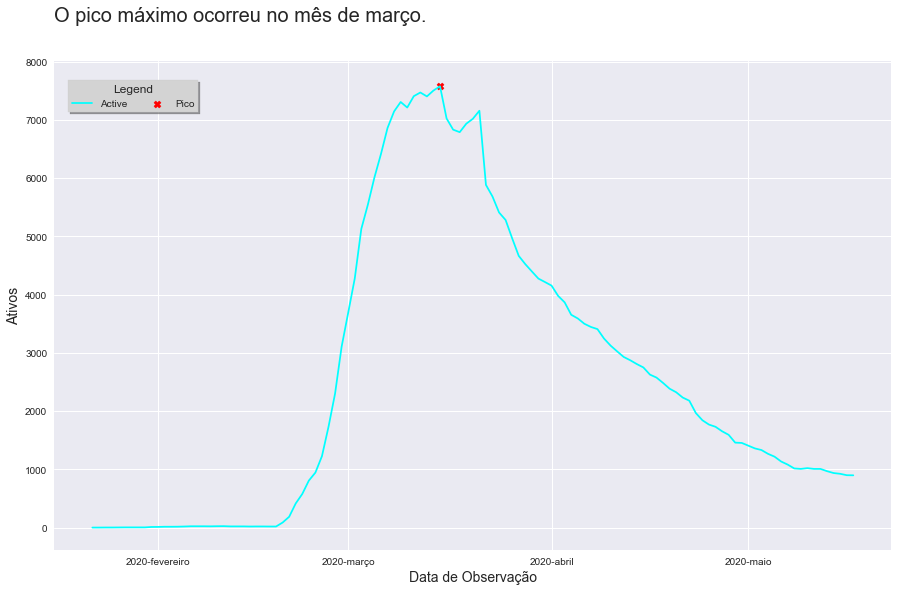

In [56]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,9))
x = df['ObservationDate'].loc[df['Country/Region'] == 'South Korea']
ax.plot(x, df['Active'].loc[df['Country/Region'] == 'South Korea'], color='cyan', label='Active')
ax.set_xlabel('Data de Observação', fontsize=14)
ax.set_ylabel('Ativos', fontsize=14)
locator = AutoDateLocator(minticks=3, maxticks=5)
date_fmt = DateFormatter('%Y-%B')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)
plt.scatter(m_peak, peak, linewidths= 0.5, marker='X', facecolor='red', label='Pico')
ax.legend(loc="upper left", bbox_to_anchor=[0.01, 0.97], ncol=2, 
          shadow=True, frameon=True, title="Legend", title_fontsize=12, 
          fancybox=False, facecolor="lightgrey")

plt.text(0.0, 1.08, f'O pico máximo ocorreu no mês de {month}.',
         horizontalalignment='left',
         fontsize=20,
         transform = ax.transAxes)

### Questão-05: Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy). Analise as informações do dataset e responda: em que mês a Itália passou a ter mais casos recuperados do que casos ativos?

In [57]:
month = df.loc[df['Country/Region'] == 'Italy'][df.Active <= df.Recovered]['Months'].tolist()[0]

Text(0.0, 1.08, 'Conforme é possível observar no gráfico o mês onde o número de casos recuperados superou\no de casos ativos foi o mês de maio.')

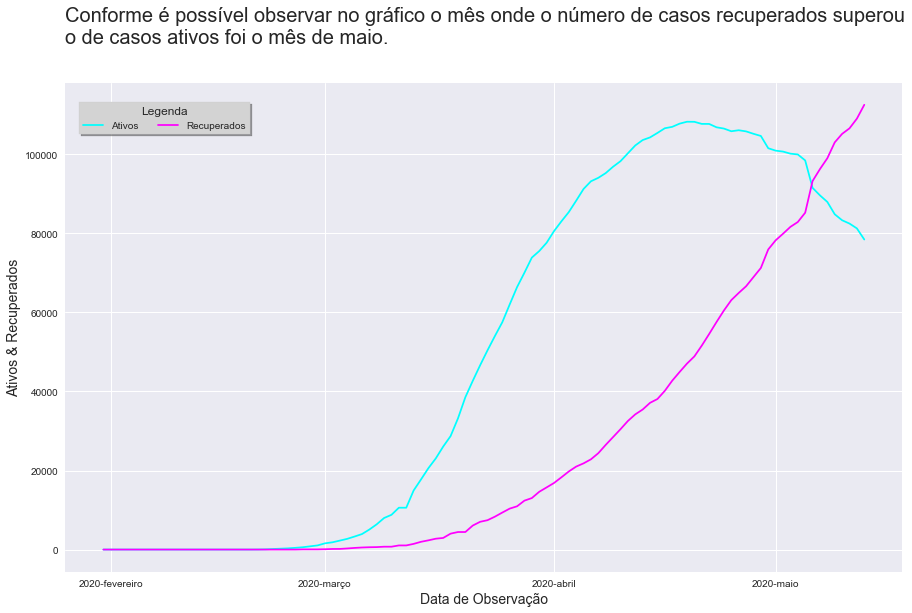

In [58]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,9))
x = df['ObservationDate'].loc[(df['Country/Region'] == 'Italy')
                                & (df['ObservationDate'] <= '2020-05-13')]

ax.plot(x, df['Active'].loc[(df['Country/Region'] == 'Italy')&
                                (df['ObservationDate'] <= '2020-05-13')], label='Ativos', color='cyan')

ax.plot(x, df['Recovered'].loc[(df['Country/Region'] == 'Italy')
                                & (df['ObservationDate'] <= '2020-05-13')], label='Recuperados', color='magenta')

ax.legend(loc="upper left", bbox_to_anchor=[0.01, 0.97], ncol=2, 
          shadow=True, frameon=True, title="Legenda", title_fontsize=12, 
          fancybox=False, facecolor="lightgrey")

ax.set_xlabel('Data de Observação', fontsize=14)
ax.set_ylabel('Ativos & Recuperados', fontsize=14)
locator = AutoDateLocator(minticks=3, maxticks=5)
date_fmt = DateFormatter('%Y-%B')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)


plt.text(0.0, 1.08, f'Conforme é possível observar no gráfico o mês onde o número de casos recuperados superou'
         f'\no de casos ativos foi o mês de {month}.',
         horizontalalignment='left',
         fontsize=20,
         transform = ax.transAxes)

### Questão-06: Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

In [59]:
def calculate_wcss(data, n_clusters):
        wcss = []
        
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
        return wcss

In [60]:
 print(f'A soma dos quadrados intra-clusters é: {calculate_wcss(X,1)[0]}')

A soma dos quadrados intra-clusters é: 31547.372471390485


### Questão-07: Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto? 

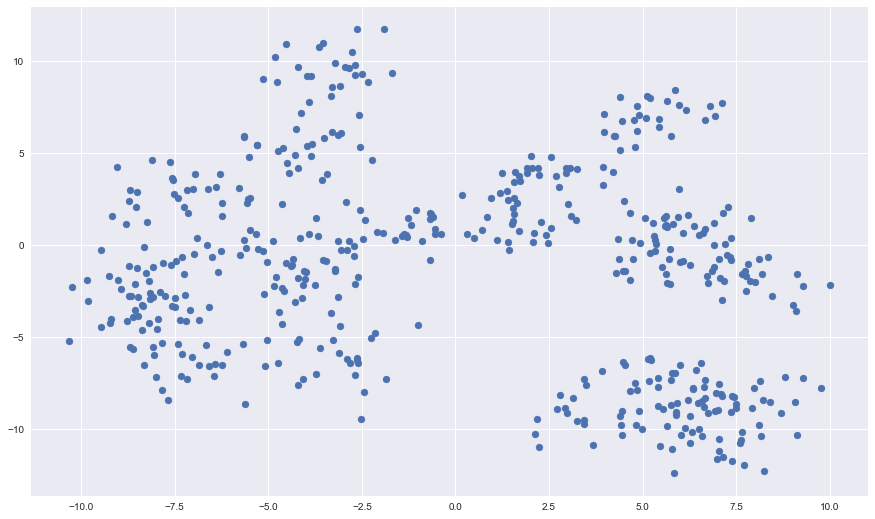

In [61]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
fig, ax = plt.subplots(figsize=(15,9))
plt.scatter(X[:,0], X[:,1])

### Questão-08: Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução? 

In [62]:
 print(f'A soma dos quadrados intra-clusters é: {calculate_wcss(X, 5)[0]}')

A soma dos quadrados intra-clusters é: 4717.404091931214


### Questão-09: Utilize o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico? 

In [63]:
df_china = df.loc[df['Country/Region'] == 'Mainland China']
df_china = df_china.groupby(['ObservationDate']).sum().reset_index()
df_china.head()

,ObservationDate,SNo,Confirmed,Deaths,Recovered,Active
0,2020-01-22,535,547.0,17.0,28.0,502.0
1,2020-01-23,1713,639.0,18.0,30.0,591.0
2,2020-01-24,3004,916.0,26.0,36.0,854.0
3,2020-01-25,4224,1399.0,42.0,39.0,1318.0
4,2020-01-26,5548,2062.0,56.0,49.0,1957.0


In [64]:
print(tabulate(df_china.head(), headers='keys', tablefmt='pipe'))

|    | ObservationDate     |   SNo |   Confirmed |   Deaths |   Recovered |   Active |
|---:|:--------------------|------:|------------:|---------:|------------:|---------:|
|  0 | 2020-01-22 00:00:00 |   535 |         547 |       17 |          28 |      502 |
|  1 | 2020-01-23 00:00:00 |  1713 |         639 |       18 |          30 |      591 |
|  2 | 2020-01-24 00:00:00 |  3004 |         916 |       26 |          36 |      854 |
|  3 | 2020-01-25 00:00:00 |  4224 |        1399 |       42 |          39 |     1318 |
|  4 | 2020-01-26 00:00:00 |  5548 |        2062 |       56 |          49 |     1957 |


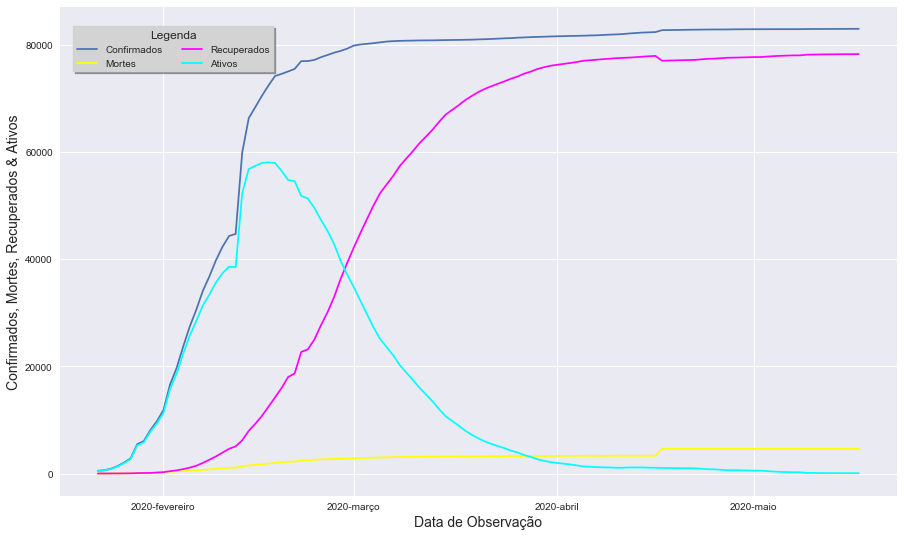

In [65]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,9))
x = df_china['ObservationDate']
ax.plot(x, df_china['Confirmed'], label='Confirmados')
ax.plot(x, df_china['Deaths'], color='yellow', label='Mortes')
ax.plot(x, df_china['Recovered'], color='magenta', label='Recuperados')
ax.plot(x, df_china['Active'], color='cyan', label='Ativos')
ax.legend(loc="upper left", bbox_to_anchor=[0.01, 0.97], ncol=2, 
          shadow=True, frameon=True, title="Legenda", title_fontsize=12, 
          fancybox=False, facecolor="lightgrey")

ax.set_xlabel('Data de Observação', fontsize=14)
ax.set_ylabel('Confirmados, Mortes, Recuperados & Ativos', fontsize=14)
locator = AutoDateLocator(minticks=3, maxticks=5)
date_fmt = DateFormatter('%Y-%B')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)


### Questão-10: Qual o objetivo do algoritmo K-Means? 

Clusterização 

### Questão-11: O algoritmo K-Means é baseado em qual tipo de aprendizagem? 

Não supervisionada 

### Questão-12: Utilize o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez? 

In [66]:
month = df.loc[df['Country/Region'] == 'Venezuela'][df.Active <= df.Recovered]['Months'].tolist()[0]

Text(0.0, 1.08, 'Conforme é possível observar a primeira vez que o número de casos recuperados superou\no de casos ativos foi o mês de abril.')

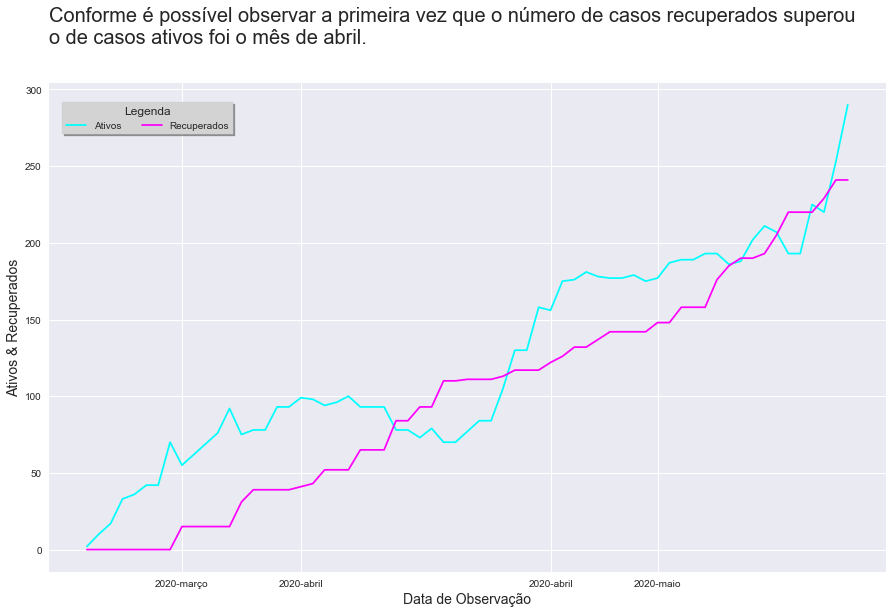

In [67]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,9))
x = df['ObservationDate'].loc[df['Country/Region'] == 'Venezuela']
ax.plot(x, df['Active'].loc[df['Country/Region'] == 'Venezuela'], label='Ativos', color='cyan')
ax.plot(x, df['Recovered'].loc[df['Country/Region'] == 'Venezuela'], label='Recuperados', color='magenta')
ax.legend(loc="upper left", bbox_to_anchor=[0.01, 0.97], ncol=2, 
          shadow=True, frameon=True, title="Legenda", title_fontsize=12, 
          fancybox=False, facecolor="lightgrey")

ax.set_xlabel('Data de Observação', fontsize=14)
ax.set_ylabel('Ativos & Recuperados', fontsize=14)
locator = AutoDateLocator(minticks=3, maxticks=5)
date_fmt = DateFormatter('%Y-%B')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(date_fmt)

plt.text(0.0, 1.08, f'Conforme é possível observar a primeira vez que o número de casos recuperados superou'
         f'\no de casos ativos foi o mês de {month}.',
         horizontalalignment='left',
         fontsize=20,
         transform = ax.transAxes)